# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [2]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [3]:
X.shape, y.shape

((500, 2), (500,))

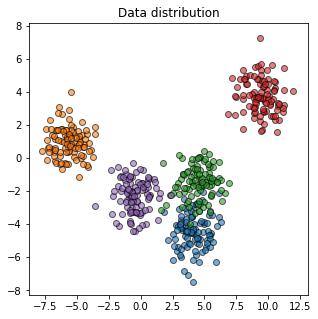

In [4]:
plt.figure(figsize=(5, 5))
for c in range(5):
    plt.scatter(X[:, 0][y==c], X[:, 1][y==c], edgecolors='k', alpha=0.6)
    plt.title('Data distribution')

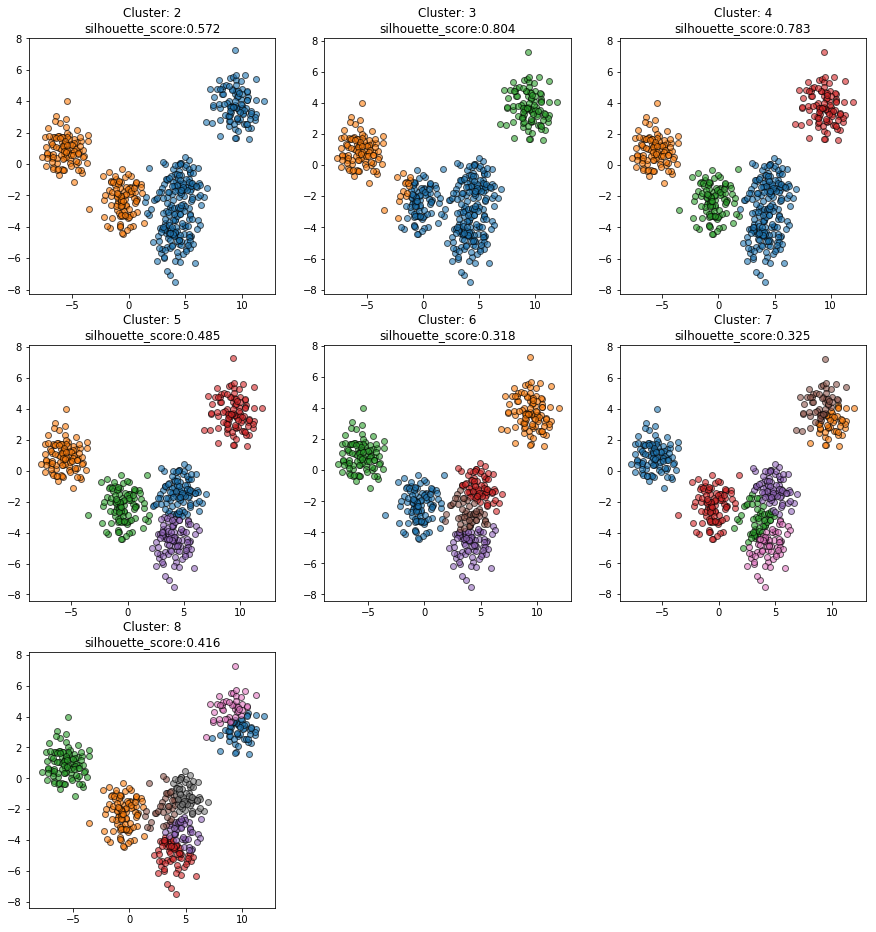

In [5]:
# 計算並繪製輪廓分析的結果

plt.figure(figsize=(15, 16))
x_low = 10
for idx, c in enumerate(range_n_clusters):
    
    est = KMeans(n_clusters=c, random_state=0)
    est.fit(X)
    labels = est.labels_
    sample_score = silhouette_samples(X, labels)
    mean_score = silhouette_score(X, labels)
    plt.subplot(3, 3, idx+1)
    for l in range(0, c):
        tmp_X = X[labels== l]
        tmp_score = sample_score[labels==l]
        avg_tmp_score = np.mean(tmp_score)
        #print(avg_tmp_score)
        tmp_label = labels[labels==l]
        plt.scatter(tmp_X[:, 0][tmp_label==l], tmp_X[:, 1][tmp_label==l], edgecolors='k', alpha=0.6)
        plt.title('Cluster: '+str(c) + '\n' + 'silhouette_score:' + str(round(avg_tmp_score, 3)))
